In [1]:
import kagglehub, os, torch
from torch.utils.data import Dataset, random_split, DataLoader
from glob import glob
from PIL import Image
import shutil
# Download latest version
dataset_path = kagglehub.dataset_download("tanlikesmath/the-oxfordiiit-pet-dataset")
shutil.rmtree(f"{dataset_path}/images/images", ignore_errors = True)
print("Path to dataset files:", dataset_path)


100%|██████████| 1.48G/1.48G [00:20<00:00, 76.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/versions/1


In [4]:
breeds ={}
volume_classes = {}

class Downloadit(Dataset):

    def __init__(self, path, pic_type=[".jpg", ".png", ".bmp"], transformations=None):
        super().__init__()
        self.pic_path = glob(f"{path}/images/*{[n for n in pic_type]}")
        self.transformations = transformations
        self.create_class()
        print(breeds)

    def __len__(self): return len(self.pic_path)

    def pic_name(self, one_pic_path):
      klass_nomi = os.path.splitext(os.path.basename(one_pic_path))[0]
      javob = ""
      for idx, char in enumerate(klass_nomi):
        if char.isalpha():
          javob += char
          keyingi_char = klass_nomi[idx + 1]
          if (keyingi_char == "_") and (not klass_nomi[idx + 2].isdigit()): javob += "_"

      return javob

    def create_class(self):
      global breeds
      global volume_classes
      idx=0
      vl = 1

      for pic_n in self.pic_path:
        f_pic = self.pic_name(pic_n)
        if not f_pic in breeds.keys():
          breeds[f_pic] = idx
          volume_classes[f_pic] = vl
          idx +=1
        else:
          volume_classes[f_pic] += 1



    def id_cls(self, pic_path_1):
      name = self.pic_name(pic_path_1)
      javob = breeds[name]

      return javob


    def __getitem__(self, idx):
        pic_path_1 = self.pic_path[idx]

        pic = Image.open(pic_path_1).convert("RGB")
        gt = torch.tensor(self.id_cls(pic_path_1))

        if self.transformations:
            pic = self.transformations(pic)

        return pic, gt


# checkpoint

<ipython-input-9-bced840feba4>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(klass_nomlari, rotation = 60)


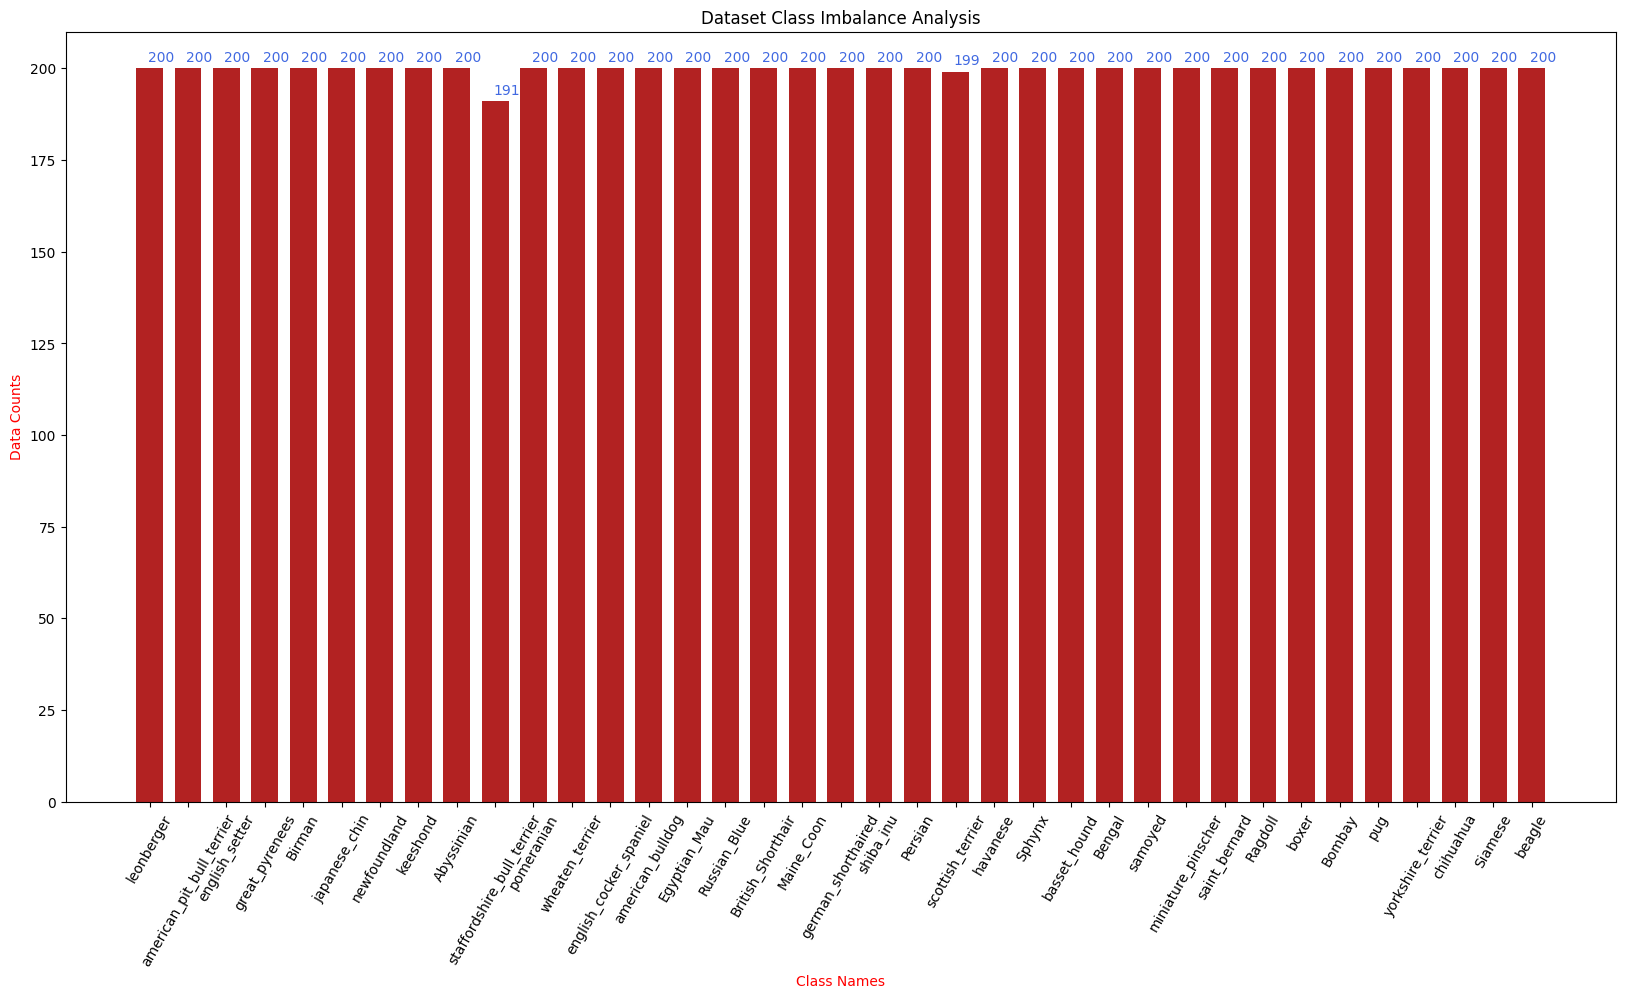

In [9]:
from matplotlib import pyplot as plt
import numpy as np
def data_analysis(data_volumes):

    width, text_width = 0.7, 0.05
    text_height = 2
    klass_nomlari = list(data_volumes.keys()); counts = list(data_volumes.values())

    fig, ax = plt.subplots(figsize = (20, 10))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = "firebrick")
    ax.set_xlabel("Class Names", color = "red")
    ax.set_xticklabels(klass_nomlari, rotation = 60)
    ax.set(xticks = indices, xticklabels = klass_nomlari)
    ax.set_ylabel("Data Counts", color = "red")
    ax.set_title(f"Dataset Class Imbalance Analysis")

    for i, v in enumerate(counts): ax.text(i - text_width, v + text_height, str(v), color = "royalblue")

data_analysis(volume_classes)

{'leonberger': 0, 'american_pit_bull_terrier': 1, 'english_setter': 2, 'great_pyrenees': 3, 'Birman': 4, 'japanese_chin': 5, 'newfoundland': 6, 'keeshond': 7, 'Abyssinian': 8, 'staffordshire_bull_terrier': 9, 'pomeranian': 10, 'wheaten_terrier': 11, 'english_cocker_spaniel': 12, 'american_bulldog': 13, 'Egyptian_Mau': 14, 'Russian_Blue': 15, 'British_Shorthair': 16, 'Maine_Coon': 17, 'german_shorthaired': 18, 'shiba_inu': 19, 'Persian': 20, 'scottish_terrier': 21, 'havanese': 22, 'Sphynx': 23, 'basset_hound': 24, 'Bengal': 25, 'samoyed': 26, 'miniature_pinscher': 27, 'saint_bernard': 28, 'Ragdoll': 29, 'boxer': 30, 'Bombay': 31, 'pug': 32, 'yorkshire_terrier': 33, 'chihuahua': 34, 'Siamese': 35, 'beagle': 36}
tensor(0)


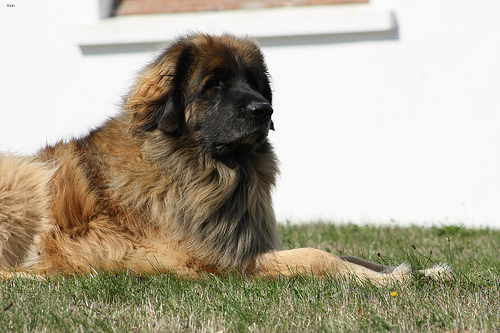

tensor(28)


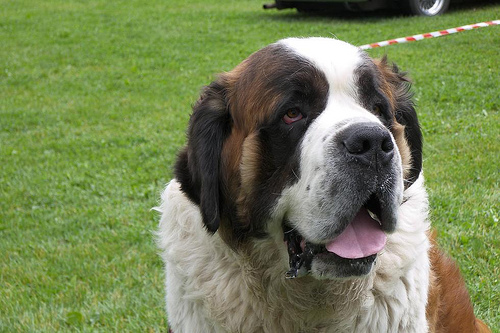

tensor(2)


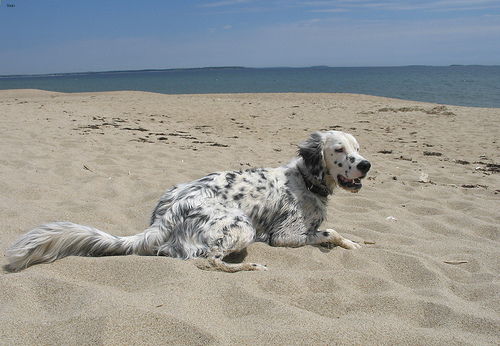

tensor(21)


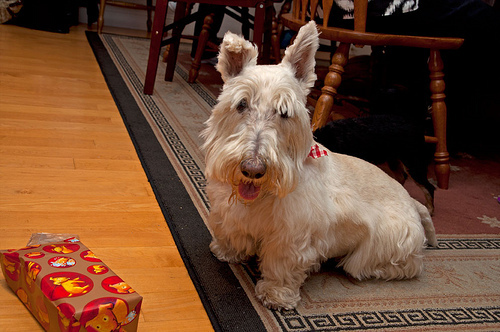

In [5]:
dataset = Downloadit(dataset_path)
for i in range(0,len(dataset),50):
  if i >= 200: break
  pic,gt = dataset[i]
  print(gt)
  display(pic)


# splitting data

In [35]:

from torchvision import transforms as T
import torchmetrics
bs = 80
pic_size = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

tfs=T.Compose([T.ToTensor(), T.Resize((pic_size, pic_size)), T.Normalize(mean = mean, std = std)])
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = int(0.5 * test_size)
test_size = test_size - val_size
dataset = Downloadit(dataset_path, transformations = tfs)
train_ds, test_ds, val_ds = random_split(dataset, [train_size, test_size, val_size])




train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=bs, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=1, shuffle=False)

{'leonberger': 0, 'american_pit_bull_terrier': 1, 'english_setter': 2, 'great_pyrenees': 3, 'Birman': 4, 'japanese_chin': 5, 'newfoundland': 6, 'keeshond': 7, 'Abyssinian': 8, 'staffordshire_bull_terrier': 9, 'pomeranian': 10, 'wheaten_terrier': 11, 'english_cocker_spaniel': 12, 'american_bulldog': 13, 'Egyptian_Mau': 14, 'Russian_Blue': 15, 'British_Shorthair': 16, 'Maine_Coon': 17, 'german_shorthaired': 18, 'shiba_inu': 19, 'Persian': 20, 'scottish_terrier': 21, 'havanese': 22, 'Sphynx': 23, 'basset_hound': 24, 'Bengal': 25, 'samoyed': 26, 'miniature_pinscher': 27, 'saint_bernard': 28, 'Ragdoll': 29, 'boxer': 30, 'Bombay': 31, 'pug': 32, 'yorkshire_terrier': 33, 'chihuahua': 34, 'Siamese': 35, 'beagle': 36}


# training and validation

In [39]:
import time
import os
from tqdm import tqdm
import torch


def model_train(train_dl, model, loss_fn, opt, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()

  for idx, batch in enumerate(tqdm(train_dl, desc = "Train jarayoni...")):
    pics, gts = batch
    pics, gts = pics.to(device), gts.to(device)
    preds = model(pics)
    t_loss = loss_fn(preds, gts)
    opt.zero_grad()
    t_loss.backward()
    opt.step()
        #accuracy
    javoblar = torch.argmax(preds, dim=1)
    acc = (torch.sum(javoblar == gts).item()/len(gts))*100
    train_acc += acc/len(train_dl)
    train_loss += t_loss.item()/len(train_dl)
  return train_loss, train_acc

def model_val(val_dl, model, loss_fn, device):
  val_loss, val_acc_2 = 0, 0
  model.to(device)
  model.eval()
  with torch.no_grad():
      for idx, batch in enumerate(tqdm(val_dl, desc="Validation jarayoni...")):
          pics, gts = batch
          pics, gts = pics.to(device), gts.to(device)
          preds = model(pics)
          v_loss = loss_fn(preds, gts).item()
          val_loss += v_loss/len(val_dl)
          #accuracy

          javoblar_1 = torch.argmax(preds, dim=1)
          acc_2 = ((torch.sum(javoblar_1 == gts ).item()/len(gts))*100)/len(val_dl)
          val_acc_2 += acc_2

  return val_loss, val_acc_2

def do_train(train_dl, val_dl, model, loss_fn, opt, device, epochs, patience, model_dir = "best_model_dir"):
  os.makedirs(model_dir, exist_ok=True)
  best_acc = 0
  patience_counter = 0
  train_losses, val_losses = [], []
  train_acces, val_acces = [], []
  start_time = time.time()
  for epoch in range(epochs):
    #if epoch == 1: break
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss, train_acc = model_train(train_dl, model, loss_fn, opt, device)
    val_loss, val_acc = model_val(val_dl, model, loss_fn, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_acces.append(train_acc)
    val_acces.append(val_acc)
    if val_acc > best_acc:
      best_acc = val_acc
      patience_counter = 0
      torch.save(model.state_dict(), os.path.join(model_dir, "best_model.pt"))
      print()

    else: patience_counter += 1
    if patience_counter == patience:
      print(f"{best_acc:.2f}% accuracyga erishgan eng yaxshi model saqlandi.")
      print(f"AI model accuracy si so'nggi {patience} epoc davomida ko'tarilmagani uchun train jarayoni yakullandi ")
      break
    print(f"Train Loss -> {train_loss:.4f}    | Train Accuracy -> {train_acc:.2f}%")
    print(f"Val Loss   -> {val_loss:.4f}    | Val Accuracy   -> {val_acc:.2f}%")

  end_time = time.time()
  print(f"\nTraining completed in {(end_time - start_time):.2f} seconds.")
  print(f"Best Validation Accuracy: {best_acc:.2f}%")
  return train_losses, val_losses, train_acces, val_acces

In [40]:
import timm
import time
import torch
rexnet = timm.create_model(model_name = "rexnet_150", pretrained = True, num_classes = 37)
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(params = rexnet.parameters(), lr = 3e-4)

train_losses, val_losses, train_acces, val_acces = do_train(train_dl = train_dl, val_dl =val_dl, model = rexnet, loss_fn = loss_fn, opt = opt, device = device, epochs = 100 , patience = 5)


Epoch 1/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]



Train Loss -> 1.0107    | Train Accuracy -> 72.43%
Val Loss   -> 0.2898    | Val Accuracy   -> 90.57%

Epoch 2/100


Validation jarayoni...: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]



Train Loss -> 0.1010    | Train Accuracy -> 97.06%
Val Loss   -> 0.2865    | Val Accuracy   -> 91.32%

Epoch 3/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]



Train Loss -> 0.0307    | Train Accuracy -> 99.20%
Val Loss   -> 0.2448    | Val Accuracy   -> 92.70%

Epoch 4/100


Validation jarayoni...: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]



Train Loss -> 0.0158    | Train Accuracy -> 99.61%
Val Loss   -> 0.2167    | Val Accuracy   -> 93.20%

Epoch 5/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


Train Loss -> 0.0112    | Train Accuracy -> 99.73%
Val Loss   -> 0.2300    | Val Accuracy   -> 92.82%

Epoch 6/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]



Train Loss -> 0.0044    | Train Accuracy -> 99.97%
Val Loss   -> 0.2255    | Val Accuracy   -> 93.72%

Epoch 7/100


Validation jarayoni...: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


Train Loss -> 0.0061    | Train Accuracy -> 99.83%
Val Loss   -> 0.2526    | Val Accuracy   -> 93.10%

Epoch 8/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


Train Loss -> 0.0039    | Train Accuracy -> 99.97%
Val Loss   -> 0.2178    | Val Accuracy   -> 93.22%

Epoch 9/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]



Train Loss -> 0.0026    | Train Accuracy -> 99.97%
Val Loss   -> 0.2212    | Val Accuracy   -> 94.10%

Epoch 10/100


Validation jarayoni...: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


Train Loss -> 0.0059    | Train Accuracy -> 99.85%
Val Loss   -> 0.2572    | Val Accuracy   -> 92.60%

Epoch 11/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


Train Loss -> 0.0329    | Train Accuracy -> 99.02%
Val Loss   -> 0.4048    | Val Accuracy   -> 88.82%

Epoch 12/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


Train Loss -> 0.0408    | Train Accuracy -> 98.74%
Val Loss   -> 0.4135    | Val Accuracy   -> 88.70%

Epoch 13/100


Validation jarayoni...: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


Train Loss -> 0.0612    | Train Accuracy -> 98.23%
Val Loss   -> 0.4344    | Val Accuracy   -> 90.17%

Epoch 14/100


Validation jarayoni...: 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

94.10% accuracyga erishgan eng yaxshi model saqlandi.
AI model accuracy si so'nggi 5 epoc davomida ko'tarilmagani uchun train jarayoni yakullandi 

Training completed in 1202.55 seconds.
Best Validation Accuracy: 94.10%


# inference

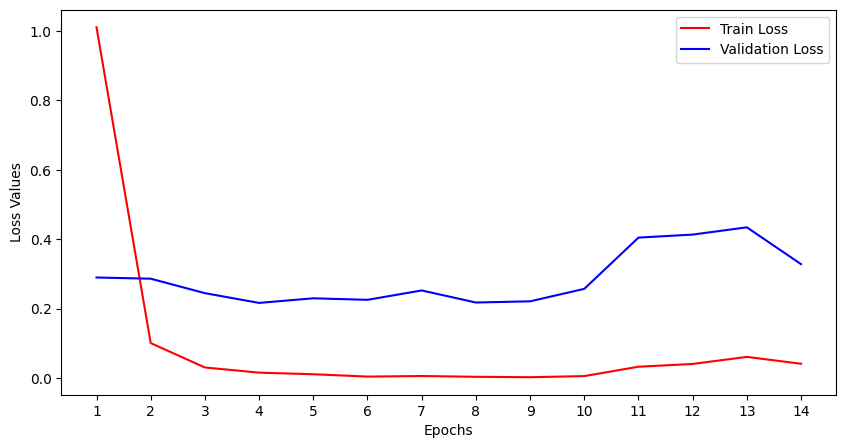

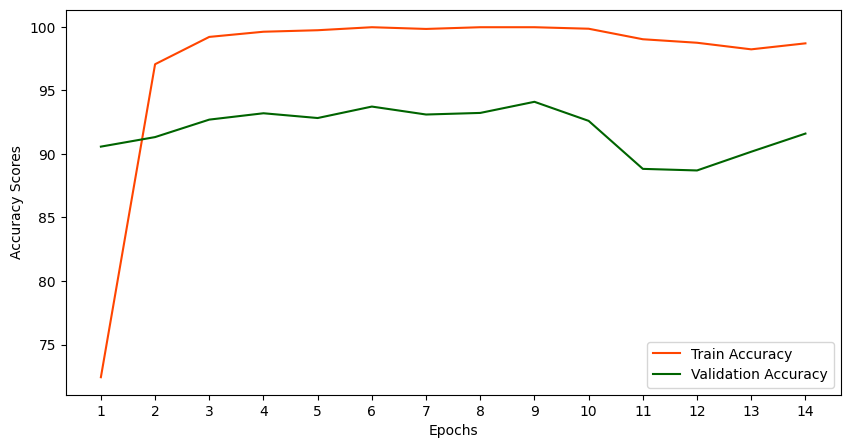

In [41]:
# learning curves
class PlotLearningCurves:

    def __init__(self, tr_losses, val_losses, tr_accs, val_accs):

        self.tr_losses, self.val_losses, self.tr_accs, self.val_accs = tr_losses, val_losses, tr_accs, val_accs

    def chizish(self, array_1, array_2, label_1, label_2, color_1, color_2):

        plt.plot(array_1, label = label_1, c = color_1); plt.plot(array_2, label = label_2, c = color_2)

    def chizmani_yaratish(self): plt.figure(figsize = (10, 5))

    def bezash(self, ylabel, xlabel = "Epochs"):

        plt.xlabel(xlabel); plt.ylabel(ylabel)
        plt.xticks(ticks = np.arange(len(self.tr_accs)), labels = [i for i in range(1, len(self.tr_accs) + 1)])
        plt.legend(); plt.show()

    def korsatish(self):

        # Figure 1
        self.chizmani_yaratish()
        self.chizish(array_1 = self.tr_losses, array_2 = self.val_losses, label_1 = "Train Loss", label_2 = "Validation Loss", color_1 = "red", color_2 = "blue"); self.bezash(ylabel = "Loss Values")

        # Figure 2
        self.chizmani_yaratish()
        self.chizish(array_1 = self.tr_accs, array_2 = self.val_accs, label_1 = "Train Accuracy", label_2 = "Validation Accuracy", color_1 = "orangered", color_2 = "darkgreen"); self.bezash(ylabel = "Accuracy Scores")



PlotLearningCurves(tr_losses=train_losses, val_losses=val_losses, tr_accs=train_acces, val_accs=val_acces).korsatish()


In [53]:
# inference ->
from tqdm import tqdm # progress bar

# !pip install grad-cam==1.4.6
# !pip install seaborn
import random
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2, seaborn as sns
from sklearn.metrics import confusion_matrix

class Denormalize:

    def __init__(self, mean, std):
        self.mean, self.std = mean, std

    def __call__(self, tensor): # forward custom model

        for t, m, s in zip(tensor, self.mean, self.std): t.mul_(s).add_(m)

        return tensor

class Inference:

    def __init__(self, model, device, klass_nomlari, rasm_hajmi = 224, mean = mean, std = std):

        self.denormalize = Denormalize(mean=mean, std=std)
        self.model = model
        self.model.eval() # BN va dropout
        self.device = device
        self.klass_nomlari, self.rasm_hajmi = klass_nomlari, rasm_hajmi


    def tensor_2_rasm(self, tensor):

        tensor = self.denormalize(tensor) # bs, im_h, im_w -> im_h, im_w, bs
        tensor = tensor.permute(1,2,0 )

        return (tensor.cpu().numpy() * 255).astype(np.uint8)


    def gradcam(self, rasm): # rasm -> 3D

        cam = GradCAMPlusPlus(self.model, target_layers = [self.model.features[-1]], use_cuda="cuda")
        # print(len(cam))
        # print(cam.shape)
        cam_javob = cam(rasm.unsqueeze(0))[0, :] # 3D -> 4D

        return cam_javob

    def inference(self, test_dl, rasmlar_soni, qatorlar):
        rasmlar, bashoratlar, bashorat_klasslar, javoblar = [], [], [], []
        aniqlilik, tartib = 0, 1

        with torch.no_grad():

            for idx, batch in tqdm(enumerate(test_dl), desc="Inference jarayoni..."):

                rasm, javob = batch
                rasm, javob = rasm.to(self.device), javob.to(self.device)
                bashorat = self.model(rasm) # logits
                bashorat_klass = torch.argmax(bashorat, dim = 1)
                aniqlilik += (bashorat_klass == javob).sum().item() # tensor -> .item() -> int
                rasmlar.append(rasm[0]) # rasm.shape -> bs, n_chs, im_h, im_w
                bashoratlar.append(bashorat[0])
                bashorat_klasslar.append(bashorat_klass[0].item())
                javoblar.append(javob[0].item())

            print(f"Modelning test datasetdagi aniqliligi -> {(aniqlilik / len(test_dl.dataset)):.3f}")

        plt.figure(figsize = (20, 10))

        indekslar = [random.randint(0, len(rasmlar) - 1) for _ in range(rasmlar_soni)]

        for idx, indeks in enumerate(indekslar):

            rasm            = self.tensor_2_rasm(rasmlar[indeks].squeeze())
            bashorat_indeks = bashorat_klasslar[indeks]
            javob_indeks    = javoblar[indeks]

            # Display image
            plt.subplot(qatorlar, rasmlar_soni // qatorlar, tartib) # 3 ta qatorlar soni, ustunlar soni, tartib: 3, 4, 1, 3, 4, 2, 3, 4 3
            tartib += 1
            plt.imshow(rasm, cmap="gray")
            plt.axis("off")

            # GradCAM visualization -> model analysis: classification  modelim rasmning qaysi qismiga qarab classification qilayotganini ko'rsatadi
            cam_rasm = self.gradcam(rasmlar[indeks]) # 3D -> 4D
            chizma = show_cam_on_image(rasm / 255, cam_rasm, image_weight=0.4, use_rgb=True) # rasm * 255 -> int -> float # rasmimiz qanchalik ko'rinishi
            plt.imshow(cv2.resize(chizma, (self.rasm_hajmi, self.rasm_hajmi), interpolation=cv2.INTER_LINEAR), alpha=0.7, cmap='jet')
            plt.axis("off")

            # Confusion matrix #
            bashorat = bashoratlar[indeks] # confusion metricsga logits kiradi (bashorat_klass emas)
            # If 1D, add a batch dimension
            if bashorat.dim() == 1:  bashorat = bashorat.unsqueeze(0) # 2D

            # Title with GT and Prediction
            if self.klass_nomlari:
                javob_nomi = self.klass_nomlari[javob_indeks]
                bashorat_nomi = self.klass_nomlari[bashorat_indeks]
                rang = "green" if javob_nomi == bashorat_nomi else "red"
                plt.title(f"Javob -> {javob_nomi} ; Bashorat -> {bashorat_nomi}", color=rang)

        plt.figure(figsize=(20, 10))
        cm = confusion_matrix(javoblar, bashorat_klasslar)
        sns.heatmap(cm, annot=True, xticklabels=self.klass_nomlari, yticklabels=self.klass_nomlari)
        plt.title("Confusion Matrix")
        plt.xlabel("Bashoratlar")
        plt.ylabel("Javoblar")
        plt.tight_layout()
        plt.show()


<ipython-input-55-6044d3d321c2>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_dir/best_model.pt"))
Inference jarayoni...: 739

Modelning test datasetdagi aniqliligi -> 0.935


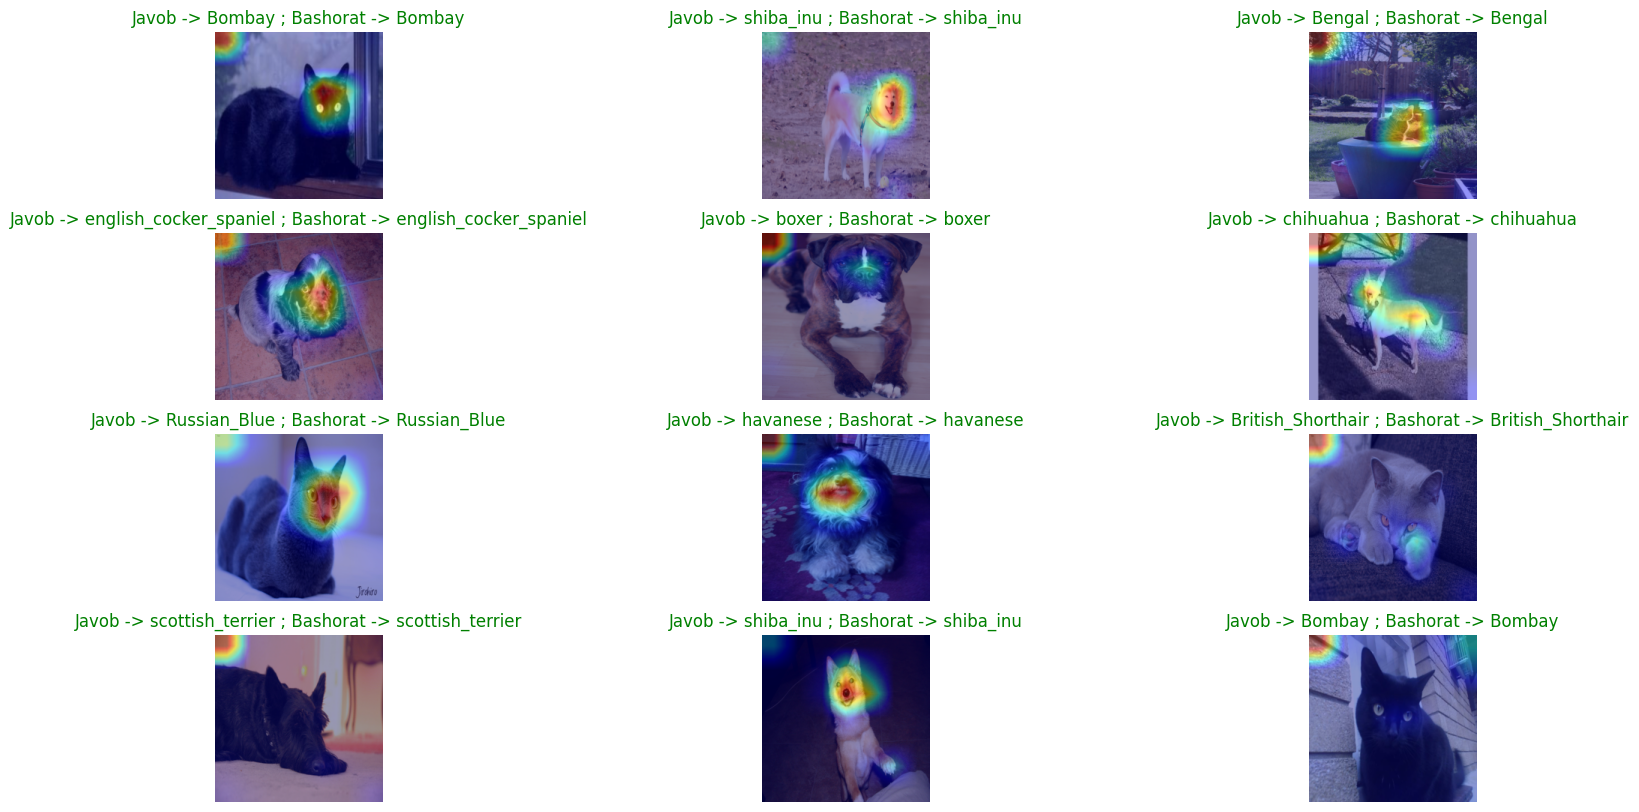

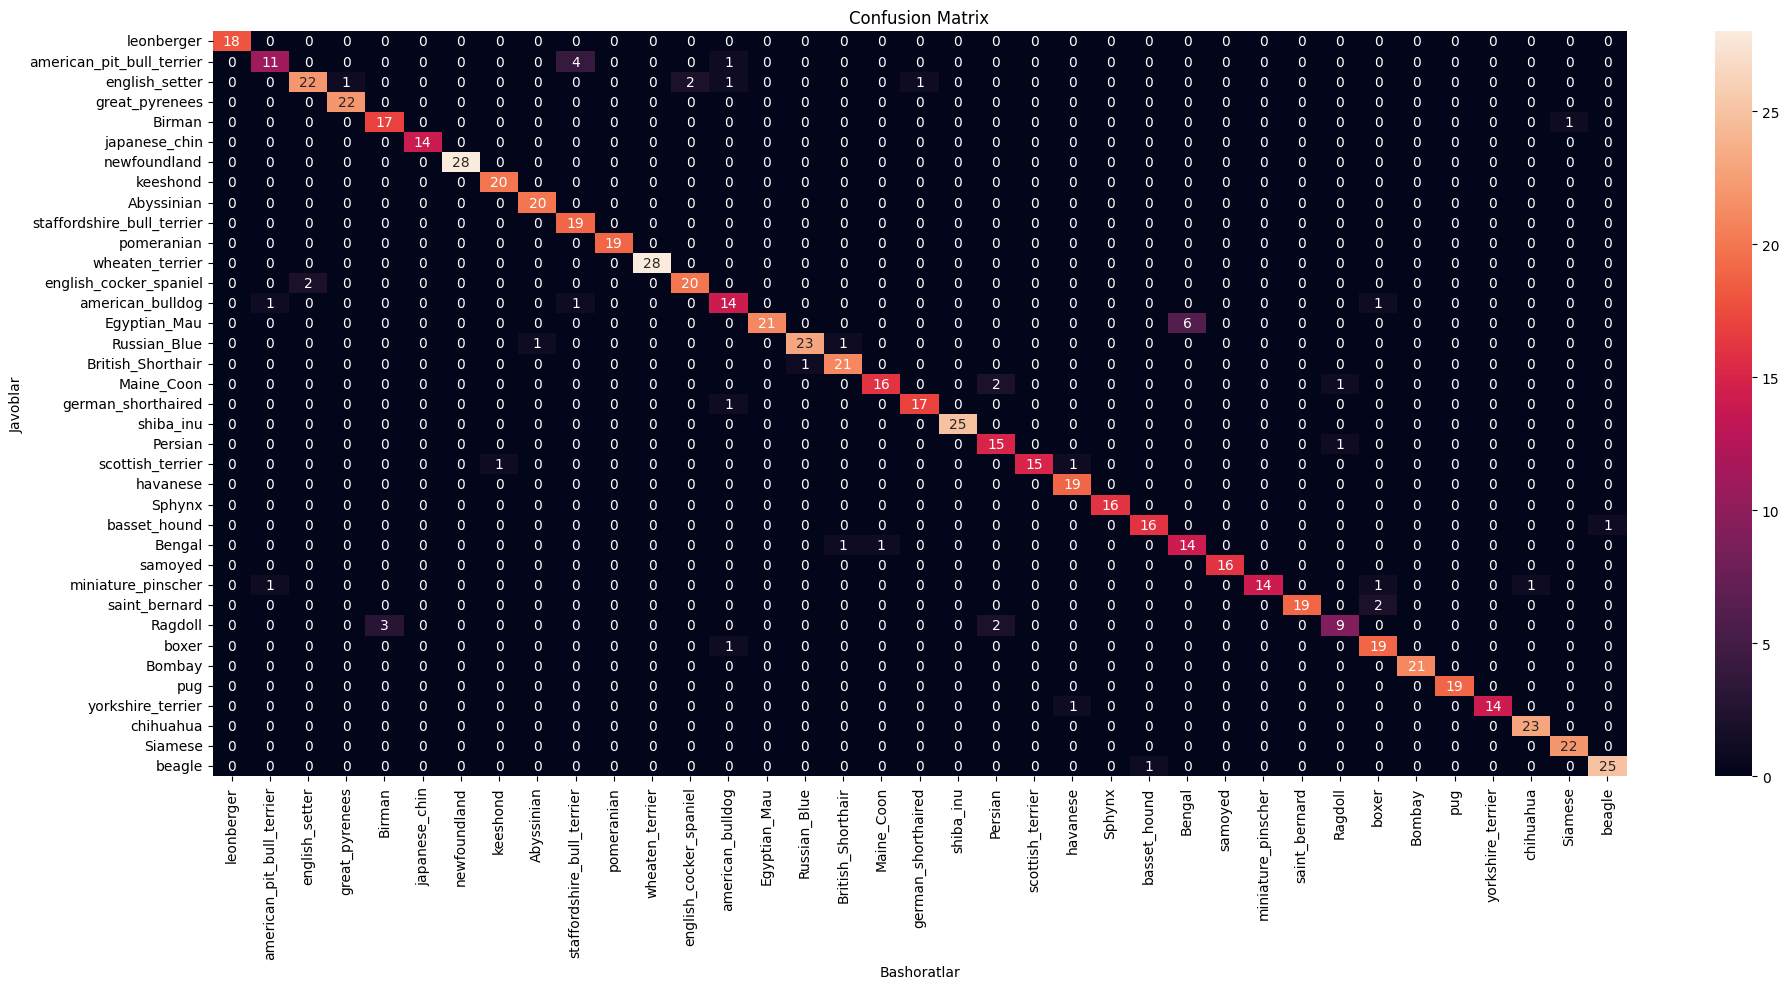

In [55]:
device = "cuda"
model = timm.create_model(model_name = "rexnet_150", pretrained  = False, num_classes = len(breeds)).to(device)
model.load_state_dict(torch.load("best_model_dir/best_model.pt"))
chizuvchi = Inference(
    model=model,
    device=device,
    klass_nomlari=list(breeds.keys()),  # List of class names
    rasm_hajmi=224
)

chizuvchi.inference(test_dl, rasmlar_soni=12, qatorlar=4)